### SafeRoad Orbit Model  Testing

The Orbit or Object-Oriented BayesIan Time Series Package utilizes Bayesian Time Series analysis. Through our experimentation of Orbit, we utilized feature engineering to test on 'ALL_INJURIES' and were able to build graphs with confidence bands for our final project. 


In [ ]:
!pip install orbit-ml

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("Crash_Data.csv")

In [ ]:
#Drop covid years data
data = data[data['CRASH_YEAR'] < 2020]
data.tail(3)

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,B_PEOPLE,C_PEOPLE,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,VEH_COUNT,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,RD_TYPE,ROADWAY_SURFACE_COND,RELATION_TO_ROADWAY,ROADWAY_ALIGNMENT,ROADWAY_SURFACE_TYPE,ROADWAY_DEFECT,ROADWAY_DESCRIPTION,INTERSECTION_TYPE,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,WORK_ZONE_RELATED,WORK_ZONE_LOCATION,WORK_ZONE_TYPE,FIRST_HARMFUL_EVENT,FIRST_HARMFUL_EVENT_LOC,ALCOHOL_NOTALCOHOL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_NOTSPEED,SCHOOL_ZONE,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,JURIS_CODE,PHYSICAL_JURIS,FUN,FAC,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET,ANIMAL,SPEED_DIFF_MAX
761999,-76.365403,37.025695,762000,192315191,2019,2019/08/18 17:00:00+00,2055,PDO. Property Damage Only,0,0,0,0,0,0,0,2,2. Angle,1. No Adverse Condition (Clear/Cloudy),4. Darkness - Road Lighted,NOT_RD,1. Dry,1. Main-Line Roadway,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"2. Two-Way, Divided, Unprotected Median",4. Four Approaches,3. Traffic Signal,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,No,No,3. No,Yes,Yes,Yes,Yes,5. Hampton Roads,114,114. City of Hampton,H. Urban Minor Arterial,"1. Divided, no control of access",Urban,OTHER,5,URBAN_PRI,Urban Intersection,Hampton Roads,Hampton Roads Transportation Planning Organiza...,R-VA SR00415WB,2.59,253175.0,5.0,No,NaN
762000,-77.445268,37.584547,762001,190095265,2019,2019/01/09 17:00:00+00,1827,PDO. Property Damage Only,0,0,0,0,0,0,0,1,8. Non-Collision,1. No Adverse Condition (Clear/Cloudy),4. Darkness - Road Lighted,NOT_RD,1. Dry,10. Intersection Related - Within 150 Feet,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous","2. Holes, Ruts, Bumps","2. Two-Way, Divided, Unprotected Median",3. Three Approaches,1. No Traffic Control,6. No Traffic Control Device Present,2. No,NaN,NaN,41. Non-Collision Unknown,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,No,No,3. No,No,No,Yes,Yes,4. Richmond,127,127. City of Richmond,E. Urban Other Principal Arterials; Connecting...,"1. Divided, no control of access",Urban,OTHER,1,URBAN_SEC,Urban Intersection,Richmond Regional,Richmond Transportation Planning Organization,R-VA127UR07555EB,1.61,209552.0,581.0,No,NaN
762001,-76.144630,36.834476,762002,190575212,2019,2019/02/22 17:00:00+00,1922,PDO. Property Damage Only,0,0,0,0,0,0,0,2,1. Rear End,5. Rain,4. Darkness - Road Lighted,NOT_RD,2. Wet,8. Non-Intersection,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"3. Two-Way, Divided, Positive Median Barrier",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,No,Yes,3. No,No,No,Yes,Yes,5. Hampton Roads,134,134. City of Virginia Beach,A. Urban Interstate,"3. Divided, full control of access",Urban,INTERSTATE,5,VDOT_IS,Not Intersection,Hampton Roads,Hampton Roads Transportation Planning Organiza...,R-VA IS00264EB,16.00,NaN,NaN,No,5.0


In [ ]:
sum_column = data["PERSONS_INJURED"] + data['PEDESTRIANS_KILLED'] + data['PEDESTRIANS_INJURED']
data["ALL_INJURIES"] = sum_column
data.head(3)

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,B_PEOPLE,C_PEOPLE,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,VEH_COUNT,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,RD_TYPE,ROADWAY_SURFACE_COND,RELATION_TO_ROADWAY,ROADWAY_ALIGNMENT,ROADWAY_SURFACE_TYPE,ROADWAY_DEFECT,ROADWAY_DESCRIPTION,INTERSECTION_TYPE,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,WORK_ZONE_RELATED,WORK_ZONE_LOCATION,WORK_ZONE_TYPE,FIRST_HARMFUL_EVENT,FIRST_HARMFUL_EVENT_LOC,ALCOHOL_NOTALCOHOL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_NOTSPEED,SCHOOL_ZONE,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,JURIS_CODE,PHYSICAL_JURIS,FUN,FAC,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET,ANIMAL,SPEED_DIFF_MAX,ALL_INJURIES
0,-76.327929,37.017204,1,141955102,2014,2014/07/14 17:00:00+00,825,PDO. Property Damage Only,0,0,0,0,0,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,8. Non-Intersection,1. Straight - Level,1. Concrete,1. No Defects,"3. Two-Way, Divided, Positive Median Barrier",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,No,No,3. No,No,No,Yes,No,5. Hampton Roads,114,114. City of Hampton,A. Urban Interstate,"3. Divided, full control of access",Urban,INTERSTATE,5,VDOT_IS,Not Intersection,Hampton Roads,Hampton Roads Transportation Planning Organiza...,R-VA IS00064EB,267.95,NaN,NaN,No,NaN,0
1,-81.855876,36.747240,2,140525231,2014,2014/02/21 17:00:00+00,1545,PDO. Property Damage Only,0,0,0,0,0,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,9. Within Intersection,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",4. Four Approaches,4. Stop Sign,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,No,No,3. No,No,No,Yes,No,1. Bristol,95,095. Washington County,4. Rural Major Collector,"0. Two-way, non-divided",Rural,PRIMARY,4,VDOT_PRI,VDOT Intersection,Mount Rogers,NaN,R-VA SR00080NB,0.00,651596.0,0.0,No,NaN,0
2,-77.220990,38.762770,3,141740135,2014,2014/03/31 17:00:00+00,1746,C. Nonvisible Injury,0,0,0,1,1,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,10. Intersection Related - Within 150 Feet,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"2. Two-Way, Divided, Unprotected Median",2. Two Approaches,6. Traffic Lanes Marked,6. No Traffic Control Device Present,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,Yes,No,No,No,No,No,No,No,No,3. No,No,No,No,No,9. Northern Virginia,29,029. Fairfax County,H. Urban Minor Arterial,"4. One-way, part of a one-way system",Urban,SECONDARY,7,VDOT_SEC,VDOT Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,R-VA029SC06945NB RMP001.00A,0.03,757276.0,0.0,No,NaN,1


In [ ]:
data['ds'] = data['CRASH_DT'].astype(np.datetime64)

In [ ]:
#percentage error for evaluation metric
# instill user confidence in bands

In [ ]:
data['ALCOHOL_NOTALCOHOL'] = data['ALCOHOL_NOTALCOHOL'].map({'Yes': 1, 'No': 0})
data['BIKE_NONBIKE'] = data['BIKE_NONBIKE'].map({'Yes': 1, 'No': 0})
data['DISTRACTED_NOTDISTRACTED'] = data['DISTRACTED_NOTDISTRACTED'].map({'Yes': 1, 'No': 0})
data['DROWSY_NOTDROWSY'] = data['DROWSY_NOTDROWSY'].map({'Yes': 1, 'No': 0})
data['DRUG_NODRUG'] = data['DRUG_NODRUG'].map({'Yes': 1, 'No': 0})
data['GR_NOGR'] = data['GR_NOGR'].map({'Yes': 1, 'No': 0})
data['HITRUN_NOT_HITRUN'] = data['HITRUN_NOT_HITRUN'].map({'Yes': 1, 'No': 0})
data['LGTRUCK_NONLGTRUCK'] = data['LGTRUCK_NONLGTRUCK'].map({'Yes': 1, 'No': 0})
data['MOTOR_NONMOTOR'] = data['MOTOR_NONMOTOR'].map({'Yes': 1, 'No': 0})
data['PED_NONPED'] = data['PED_NONPED'].map({'Yes': 1, 'No': 0})
data['SPEED_NOTSPEED'] = data['SPEED_NOTSPEED'].map({'Yes': 1, 'No': 0})
data['NIGHT'] = data['NIGHT'].map({'Yes': 1, 'No': 0})




In [ ]:
data['PLAN_DISTRICT'].value_counts()

Northern Virginia                          178363
Hampton Roads                              153863
Richmond Regional                           88583
George Washington Regional                  37987
Richmond Regional, Crater                   34065
Central Shenandoah                          29688
Roanoke Valley-Alleghany                    27282
Thomas Jefferson                            24205
Region 2000                                 22489
Northern Shenandoah Valley                  21549
Mount Rogers                                20535
Rappahannock - Rapidan                      19259
Crater                                      18096
New River Valley                            16927
West Piedmont                               16108
Cumberland Plateau                           8661
Commonwealth Regional                        8045
Southside                                    7988
Lenowisco                                    7573
Roanoke Valley-Alleghany, West Piedmont      5484


In [ ]:
df1 = data[data['PLAN_DISTRICT'] == 'Northern Virginia']
df2 = data[data['PLAN_DISTRICT'] == 'Hampton Roads']
df3 = data[data['PLAN_DISTRICT'] == 'Richmond Regional']
df4 = data[data['PLAN_DISTRICT'] == 'George Washington Regional']
df5 = data[data['PLAN_DISTRICT'] == 'Richmond Regional, Crater']
df6 = data[data['PLAN_DISTRICT'] == 'Central Shenandoah']
df7 = data[data['PLAN_DISTRICT'] == 'Roanoke Valley-Alleghany']
df8 = data[data['PLAN_DISTRICT'] == 'Thomas Jefferson']
df9 = data[data['PLAN_DISTRICT'] == 'Region 2000']
df10 = data[data['PLAN_DISTRICT'] == 'Northern Shenandoah Valley']
df1.head(3)

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,B_PEOPLE,C_PEOPLE,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,VEH_COUNT,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,RD_TYPE,ROADWAY_SURFACE_COND,RELATION_TO_ROADWAY,ROADWAY_ALIGNMENT,ROADWAY_SURFACE_TYPE,ROADWAY_DEFECT,ROADWAY_DESCRIPTION,INTERSECTION_TYPE,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,WORK_ZONE_RELATED,WORK_ZONE_LOCATION,WORK_ZONE_TYPE,FIRST_HARMFUL_EVENT,FIRST_HARMFUL_EVENT_LOC,ALCOHOL_NOTALCOHOL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_NOTSPEED,SCHOOL_ZONE,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,JURIS_CODE,PHYSICAL_JURIS,FUN,FAC,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET,ANIMAL,SPEED_DIFF_MAX,ALL_INJURIES,ds
2,-77.220990,38.762770,3,141740135,2014,2014/03/31 17:00:00+00,1746,C. Nonvisible Injury,0,0,0,1,1,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,10. Intersection Related - Within 150 Feet,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"2. Two-Way, Divided, Unprotected Median",2. Two Approaches,6. Traffic Lanes Marked,6. No Traffic Control Device Present,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,0,Belted,0,1,0,0,0,0,0,0,0,0,3. No,No,No,No,0,9. Northern Virginia,29,029. Fairfax County,H. Urban Minor Arterial,"4. One-way, part of a one-way system",Urban,SECONDARY,7,VDOT_SEC,VDOT Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,R-VA029SC06945NB RMP001.00A,0.03,757276.0,0.0,No,NaN,1,2014-03-31 17:00:00
4,-77.306306,38.847087,5,141715186,2014,2014/06/19 17:00:00+00,806,B. Visible Injury,0,0,1,0,1,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,8. Non-Intersection,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,0,Unbelted,0,0,0,0,0,0,0,0,0,0,3. No,No,Yes,Yes,0,9. Northern Virginia,151,151. City of Fairfax,E. Urban Other Principal Arterials; Connecting...,"0. Two-way, non-divided",Urban,OTHER,7,URBAN_PRI,Urban Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,R-VA SR00123SB,15.01,278857.0,53.0,No,NaN,1,2014-06-19 17:00:00
12,-77.670294,38.883672,13,141675203,2014,2014/06/15 17:00:00+00,1400,B. Visible Injury,0,0,1,0,1,0,0,2,2. Angle,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,9. Within Intersection,5. Hillcrest - Straight,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"2. Two-Way, Divided, Unprotected Median",2. Two Approaches,4. Stop Sign,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,0,Belted,1,1,0,0,0,0,0,0,0,0,3. No,No,No,Yes,0,9. Northern Virginia,76,076. Prince William County,6. Rural Local,"0. Two-way, non-divided",Rural,SECONDARY,7,VDOT_SEC,VDOT Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,R-VA076SC00600SB,2.22,546004.0,95.0,No,NaN,1,2014-06-15 17:00:00


In [ ]:
from orbit.utils.dataset import load_iclaims
from orbit.models.dlt import DLTFull
from orbit.diagnostics.plot import plot_predicted_data

In [ ]:
data.columns

Index(['X', 'Y', 'OBJECTID', 'DOCUMENT_NBR', 'CRASH_YEAR', 'CRASH_DT',
       'CRASH_MILITARY_TM', 'CRASH_SEVERITY', 'K_PEOPLE', 'A_PEOPLE',
       'B_PEOPLE', 'C_PEOPLE', 'PERSONS_INJURED', 'PEDESTRIANS_KILLED',
       'PEDESTRIANS_INJURED', 'VEH_COUNT', 'COLLISION_TYPE',
       'WEATHER_CONDITION', 'LIGHT_CONDITION', 'RD_TYPE',
       'ROADWAY_SURFACE_COND', 'RELATION_TO_ROADWAY', 'ROADWAY_ALIGNMENT',
       'ROADWAY_SURFACE_TYPE', 'ROADWAY_DEFECT', 'ROADWAY_DESCRIPTION',
       'INTERSECTION_TYPE', 'TRAFFIC_CONTROL_TYPE', 'TRFC_CTRL_STATUS_TYPE',
       'WORK_ZONE_RELATED', 'WORK_ZONE_LOCATION', 'WORK_ZONE_TYPE',
       'FIRST_HARMFUL_EVENT', 'FIRST_HARMFUL_EVENT_LOC', 'ALCOHOL_NOTALCOHOL',
       'BELTED_UNBELTED', 'BIKE_NONBIKE', 'DISTRACTED_NOTDISTRACTED',
       'DROWSY_NOTDROWSY', 'DRUG_NODRUG', 'GR_NOGR', 'HITRUN_NOT_HITRUN',
       'LGTRUCK_NONLGTRUCK', 'MOTOR_NONMOTOR', 'PED_NONPED', 'SPEED_NOTSPEED',
       'SCHOOL_ZONE', 'SENIOR_NOTSENIOR', 'YOUNG_NOTYOUNG', 'MAINLINE_YN',

In [ ]:
df = df1
df = df.iloc[::10, :] #for memory saving
#Datetime was throwing an error when there were duplicate datetime objects
df = df.drop_duplicates(subset = 'ds')
df = df.sort_values(by = 'ds')
test_size = round(0.1*len(df['X']))
train_df = df[:-test_size]
test_df = df[-test_size:]

In [ ]:
df1.tail(3)

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,B_PEOPLE,C_PEOPLE,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,VEH_COUNT,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,RD_TYPE,ROADWAY_SURFACE_COND,RELATION_TO_ROADWAY,ROADWAY_ALIGNMENT,ROADWAY_SURFACE_TYPE,ROADWAY_DEFECT,ROADWAY_DESCRIPTION,INTERSECTION_TYPE,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,WORK_ZONE_RELATED,WORK_ZONE_LOCATION,WORK_ZONE_TYPE,FIRST_HARMFUL_EVENT,FIRST_HARMFUL_EVENT_LOC,ALCOHOL_NOTALCOHOL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_NOTSPEED,SCHOOL_ZONE,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,JURIS_CODE,PHYSICAL_JURIS,FUN,FAC,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET,ANIMAL,SPEED_DIFF_MAX,ALL_INJURIES,ds
761981,-77.248615,38.810682,761982,192675353,2019,2019/09/23 17:00:00+00,2044,PDO. Property Damage Only,0,0,0,0,0,0,0,3,1. Rear End,1. No Adverse Condition (Clear/Cloudy),4. Darkness - Road Lighted,NOT_RD,1. Dry,10. Intersection Related - Within 150 Feet,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"3. Two-Way, Divided, Positive Median Barrier",4. Four Approaches,3. Traffic Signal,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,0,Belted,0,1,0,0,0,0,0,0,0,0,3. No,Yes,No,Yes,1,9. Northern Virginia,29,029. Fairfax County,H. Urban Minor Arterial,"1. Divided, no control of access",Urban,SECONDARY,7,VDOT_SEC,VDOT Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,R-VA029SC00620WB,15.79,263360.0,42.0,No,NaN,0,2019-09-23 17:00:00
761986,-77.310510,38.958553,761987,193135238,2019,2019/11/08 17:00:00+00,1630,PDO. Property Damage Only,0,0,0,0,0,0,0,3,3. Head On,1. No Adverse Condition (Clear/Cloudy),3. Dusk,RD_UNKNOWN,1. Dry,1. Main-Line Roadway,4. Grade - Curve,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"2. Two-Way, Divided, Unprotected Median",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,0,Belted,0,1,1,0,0,0,0,0,0,0,3. No,No,No,Yes,0,9. Northern Virginia,29,029. Fairfax County,H. Urban Minor Arterial,"0. Two-way, non-divided",Urban,SECONDARY,7,VDOT_SEC,Not Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,R-VA029SC00674SB,5.86,264343.0,908.0,No,NaN,0,2019-11-08 17:00:00
761993,-77.270293,38.877751,761994,192505200,2019,2019/09/07 17:00:00+00,1652,PDO. Property Damage Only,0,0,0,0,0,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,8. Non-Intersection,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"3. Two-Way, Divided, Positive Median Barrier",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,1. Yes,3. Activity Area,3. Work on Shoulder or Median,20. Motor Vehicle In Transport,1. On Roadway,0,Belted,0,0,0,0,0,0,0,0,0,0,3. No,No,No,Yes,0,9. Northern Virginia,29,029. Fairfax County,A. Urban Interstate,"3. Divided, full control of access",Urban,INTERSTATE,7,VDOT_IS,Not Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,R-VA IS00066EB,62.05,NaN,NaN,No,NaN,0,2019-09-07 17:00:00


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


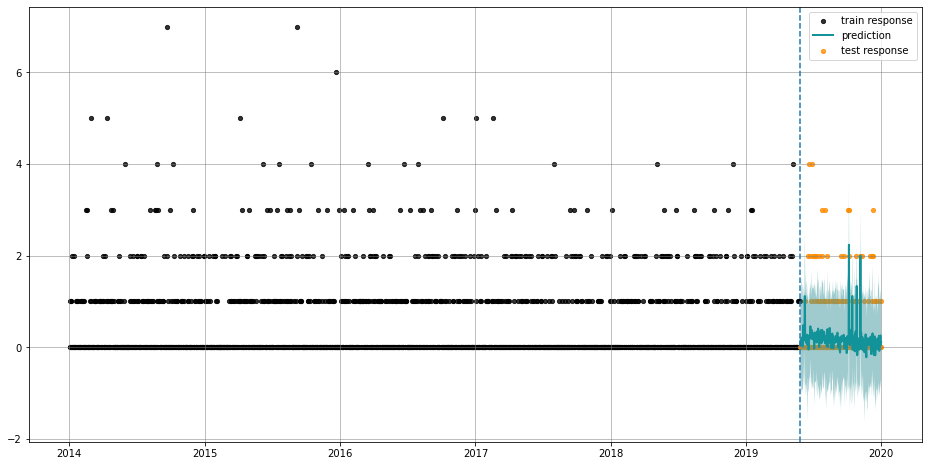

<AxesSubplot:>

In [ ]:
dlt = DLTFull(
  response_col='ALL_INJURIES', date_col='ds',
  regressor_col=['SPEED_NOTSPEED','PED_NONPED','MOTOR_NONMOTOR','BIKE_NONBIKE',	'DISTRACTED_NOTDISTRACTED',
                 'DROWSY_NOTDROWSY','DRUG_NODRUG','HITRUN_NOT_HITRUN','LGTRUCK_NONLGTRUCK','ALCOHOL_NOTALCOHOL', 'NIGHT'],
  seasonality=52,
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

fig1 = plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


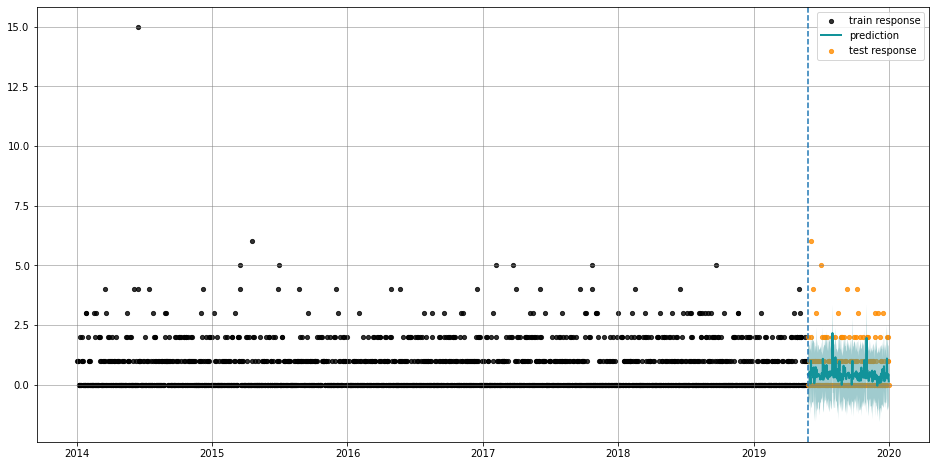

In [ ]:
df = df2
df = df.iloc[::10, :] #for memory saving
#Datetime was throwing an error when there were duplicate datetime objects
df = df.drop_duplicates(subset = 'ds')
df = df.sort_values(by = 'ds')
test_size = round(0.1*len(df['X']))
train_df = df[:-test_size]
test_df = df[-test_size:]

dlt = DLTFull(
  response_col='ALL_INJURIES', date_col='ds',
  regressor_col=['SPEED_NOTSPEED','PED_NONPED','MOTOR_NONMOTOR','BIKE_NONBIKE',	'DISTRACTED_NOTDISTRACTED',
                 'DROWSY_NOTDROWSY','DRUG_NODRUG','HITRUN_NOT_HITRUN','LGTRUCK_NONLGTRUCK','ALCOHOL_NOTALCOHOL', 'NIGHT'],
  seasonality=52,
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

fig2 = plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

In [ ]:
fig2

<AxesSubplot:>

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


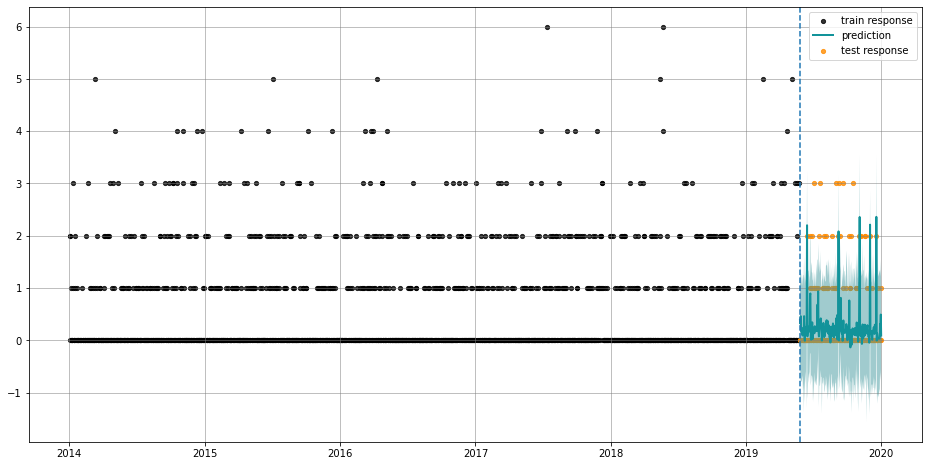

In [ ]:
df = df3
df = df.iloc[::10, :] #for memory saving
#Datetime was throwing an error when there were duplicate datetime objects
df = df.drop_duplicates(subset = 'ds')
df = df.sort_values(by = 'ds')
test_size = round(0.1*len(df['X']))
train_df = df[:-test_size]
test_df = df[-test_size:]

dlt = DLTFull(
  response_col='ALL_INJURIES', date_col='ds',
  regressor_col=['SPEED_NOTSPEED','PED_NONPED','MOTOR_NONMOTOR','BIKE_NONBIKE',	'DISTRACTED_NOTDISTRACTED',
                 'DROWSY_NOTDROWSY','DRUG_NODRUG','HITRUN_NOT_HITRUN','LGTRUCK_NONLGTRUCK','ALCOHOL_NOTALCOHOL', 'NIGHT'],
  seasonality=52,
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

fig3 = plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


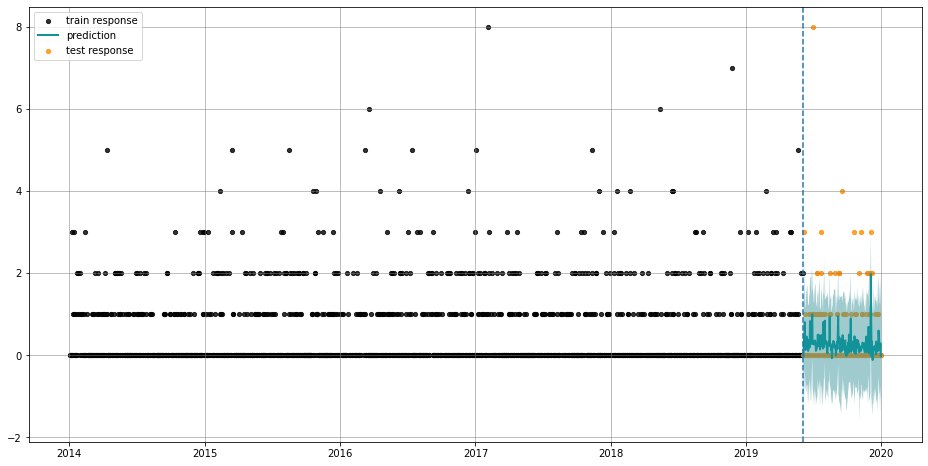

In [ ]:
df = df4
df = df.iloc[::10, :] #for memory saving
#Datetime was throwing an error when there were duplicate datetime objects
df = df.drop_duplicates(subset = 'ds')
df = df.sort_values(by = 'ds')
test_size = round(0.1*len(df['X']))
train_df = df[:-test_size]
test_df = df[-test_size:]

dlt = DLTFull(
  response_col='ALL_INJURIES', date_col='ds',
  regressor_col=['SPEED_NOTSPEED','PED_NONPED','MOTOR_NONMOTOR','BIKE_NONBIKE',	'DISTRACTED_NOTDISTRACTED',
                 'DROWSY_NOTDROWSY','DRUG_NODRUG','HITRUN_NOT_HITRUN','LGTRUCK_NONLGTRUCK','ALCOHOL_NOTALCOHOL', 'NIGHT'],
  seasonality=52,
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

fig4 = plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


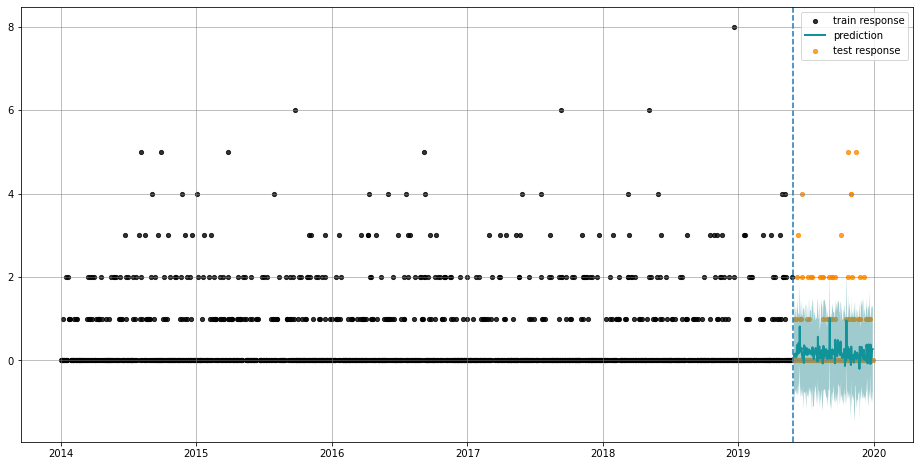

In [ ]:
df = df5
df = df.iloc[::10, :] #for memory saving
#Datetime was throwing an error when there were duplicate datetime objects
df = df.drop_duplicates(subset = 'ds')
df = df.sort_values(by = 'ds')
test_size = round(0.1*len(df['X']))
train_df = df[:-test_size]
test_df = df[-test_size:]

dlt = DLTFull(
  response_col='ALL_INJURIES', date_col='ds',
  regressor_col=['SPEED_NOTSPEED','PED_NONPED','MOTOR_NONMOTOR','BIKE_NONBIKE',	'DISTRACTED_NOTDISTRACTED',
                 'DROWSY_NOTDROWSY','DRUG_NODRUG','HITRUN_NOT_HITRUN','LGTRUCK_NONLGTRUCK','ALCOHOL_NOTALCOHOL', 'NIGHT'],
  seasonality=52,
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

fig5 = plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


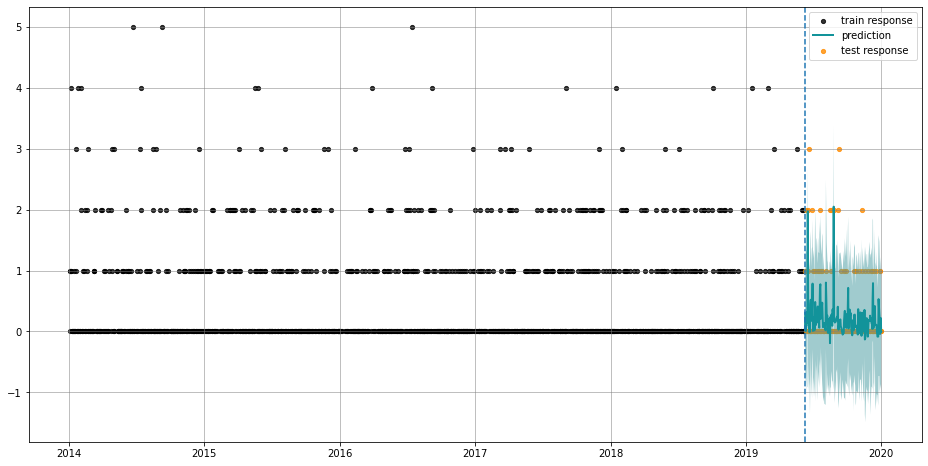

In [ ]:
df = df6
df = df.iloc[::10, :] #for memory saving
#Datetime was throwing an error when there were duplicate datetime objects
df = df.drop_duplicates(subset = 'ds')
df = df.sort_values(by = 'ds')
test_size = round(0.1*len(df['X']))
train_df = df[:-test_size]
test_df = df[-test_size:]

dlt = DLTFull(
  response_col='ALL_INJURIES', date_col='ds',
  regressor_col=['SPEED_NOTSPEED','PED_NONPED','MOTOR_NONMOTOR','BIKE_NONBIKE',	'DISTRACTED_NOTDISTRACTED',
                 'DROWSY_NOTDROWSY','DRUG_NODRUG','HITRUN_NOT_HITRUN','LGTRUCK_NONLGTRUCK','ALCOHOL_NOTALCOHOL', 'NIGHT'],
  seasonality=52,
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

fig6 = plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


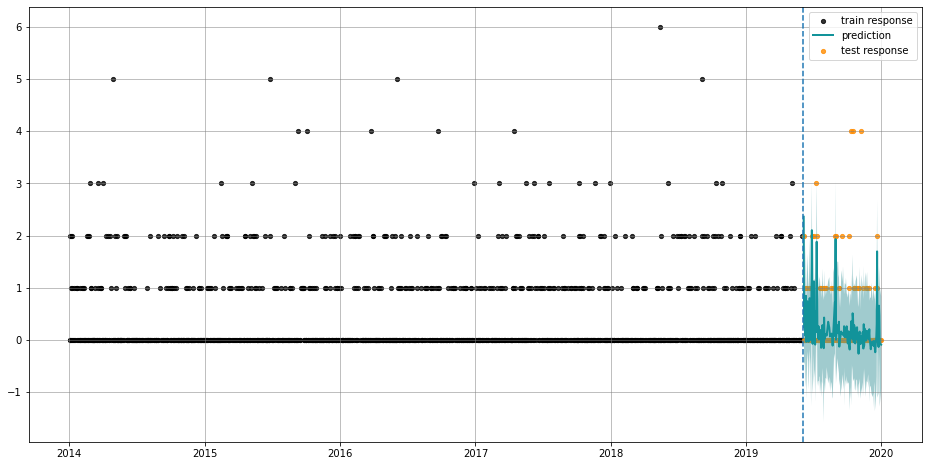

In [ ]:
df = df7
df = df.iloc[::10, :] #for memory saving
#Datetime was throwing an error when there were duplicate datetime objects
df = df.drop_duplicates(subset = 'ds')
df = df.sort_values(by = 'ds')
test_size = round(0.1*len(df['X']))
train_df = df[:-test_size]
test_df = df[-test_size:]

dlt = DLTFull(
  response_col='ALL_INJURIES', date_col='ds',
  regressor_col=['SPEED_NOTSPEED','PED_NONPED','MOTOR_NONMOTOR','BIKE_NONBIKE',	'DISTRACTED_NOTDISTRACTED',
                 'DROWSY_NOTDROWSY','DRUG_NODRUG','HITRUN_NOT_HITRUN','LGTRUCK_NONLGTRUCK','ALCOHOL_NOTALCOHOL', 'NIGHT'],
  seasonality=52,
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

fig7 = plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


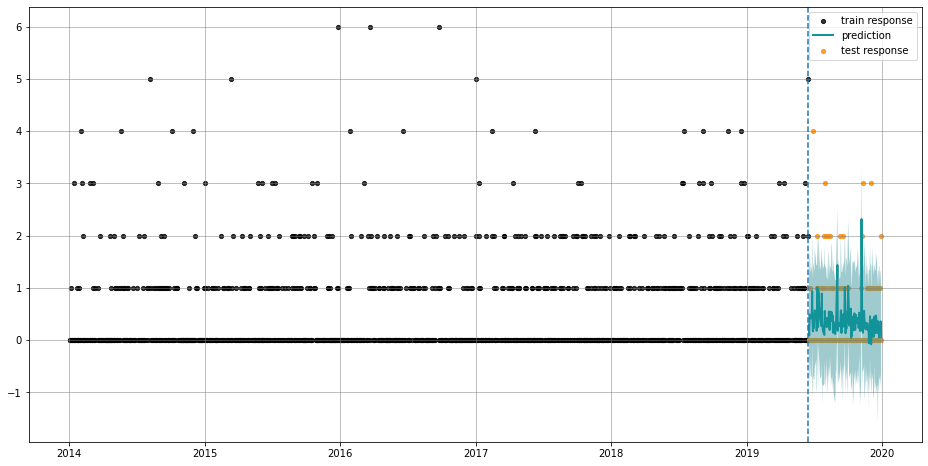

In [ ]:
df = df8
df = df.iloc[::10, :] #for memory saving
#Datetime was throwing an error when there were duplicate datetime objects
df = df.drop_duplicates(subset = 'ds')
df = df.sort_values(by = 'ds')
test_size = round(0.1*len(df['X']))
train_df = df[:-test_size]
test_df = df[-test_size:]

dlt = DLTFull(
  response_col='ALL_INJURIES', date_col='ds',
  regressor_col=['SPEED_NOTSPEED','PED_NONPED','MOTOR_NONMOTOR','BIKE_NONBIKE',	'DISTRACTED_NOTDISTRACTED',
                 'DROWSY_NOTDROWSY','DRUG_NODRUG','HITRUN_NOT_HITRUN','LGTRUCK_NONLGTRUCK','ALCOHOL_NOTALCOHOL', 'NIGHT'],
  seasonality=52,
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

fig8 = plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


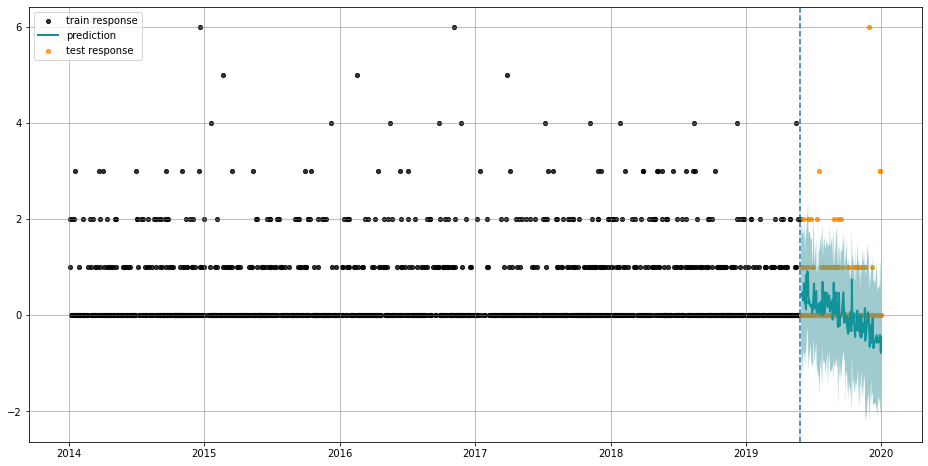

In [ ]:
df = df9
df = df.iloc[::10, :] #for memory saving
#Datetime was throwing an error when there were duplicate datetime objects
df = df.drop_duplicates(subset = 'ds')
df = df.sort_values(by = 'ds')
test_size = round(0.1*len(df['X']))
train_df = df[:-test_size]
test_df = df[-test_size:]

dlt = DLTFull(
  response_col='ALL_INJURIES', date_col='ds',
  regressor_col=['SPEED_NOTSPEED','PED_NONPED','MOTOR_NONMOTOR','BIKE_NONBIKE',	'DISTRACTED_NOTDISTRACTED',
                 'DROWSY_NOTDROWSY','DRUG_NODRUG','HITRUN_NOT_HITRUN','LGTRUCK_NONLGTRUCK','ALCOHOL_NOTALCOHOL', 'NIGHT'],
  seasonality=52,
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

fig9 = plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


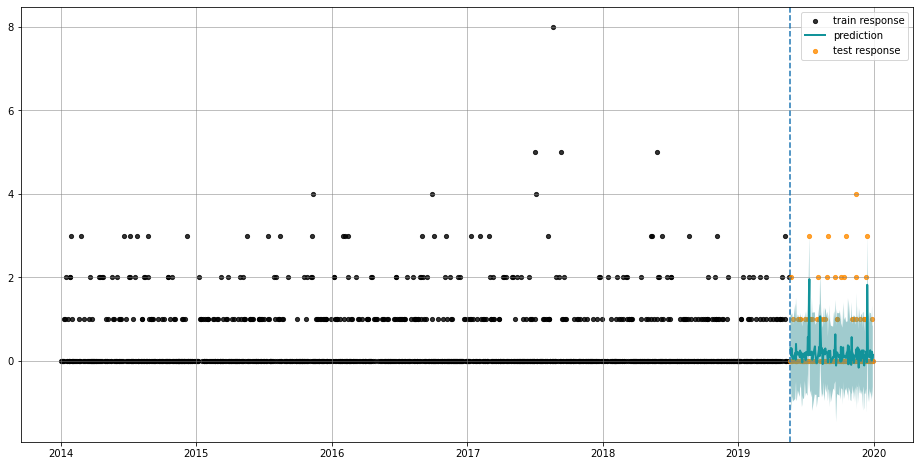

In [ ]:
df = df10
df = df.iloc[::10, :] #for memory saving
#Datetime was throwing an error when there were duplicate datetime objects
df = df.drop_duplicates(subset = 'ds')
df = df.sort_values(by = 'ds')
test_size = round(0.1*len(df['X']))
train_df = df[:-test_size]
test_df = df[-test_size:]

dlt = DLTFull(
  response_col='ALL_INJURIES', date_col='ds',
  regressor_col=['SPEED_NOTSPEED','PED_NONPED','MOTOR_NONMOTOR','BIKE_NONBIKE',	'DISTRACTED_NOTDISTRACTED',
                 'DROWSY_NOTDROWSY','DRUG_NODRUG','HITRUN_NOT_HITRUN','LGTRUCK_NONLGTRUCK','ALCOHOL_NOTALCOHOL', 'NIGHT'],
  seasonality=52,
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

fig10 = plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

In [ ]:

dlt.fit(df)
predicted_df = dlt.predict(df, decompose=True)
_ = plot_predicted_components(predicted_df, date_col)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


NameError: ignored

In [ ]:
df = df10
df = df.iloc[::10, :] #for memory saving
#Datetime was throwing an error when there were duplicate datetime objects
df = df.drop_duplicates(subset = 'ds')
df = df.sort_values(by = 'ds')
test_size = round(0.1*len(df['X']))
train_df = df[:-test_size]
test_df = df[-test_size:]

In [ ]:
predicted_df

,ds,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95,regression_5,regression,regression_95
0,2014-01-01 17:00:00,-0.755363,0.056591,0.854593,-0.589150,0.211496,1.010274,-0.210212,-0.159274,-0.085782,0.000000,0.000000,0.000000
1,2014-01-02 17:00:00,-0.746308,0.200329,1.298516,-0.808777,0.094572,1.138443,-0.122276,0.041786,0.187090,-0.001592,0.067619,0.142173
2,2014-01-04 17:00:00,-0.613773,0.212754,1.199293,-0.760222,0.212667,1.116451,-0.138653,0.039949,0.210672,0.000000,0.000000,0.000000
3,2014-01-05 17:00:00,-0.882908,0.031915,1.063830,-0.862534,0.026071,1.076318,-0.170798,-0.028897,0.107811,-0.028005,0.030006,0.086829
4,2014-01-06 17:00:00,-0.570413,0.251769,1.126768,-0.704094,0.160553,0.867544,-0.057064,0.068355,0.257860,-0.001592,0.067619,0.142173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,2019-12-24 17:00:00,-0.869595,0.114224,1.257157,-0.822646,0.122738,1.152783,-0.174120,-0.029709,0.152758,-0.001592,0.067619,0.142173
1364,2019-12-26 17:00:00,-0.578462,0.124124,0.746379,-0.594451,0.124287,0.824701,-0.134071,0.000509,0.164706,0.000000,0.000000,0.000000
1365,2019-12-27 17:00:00,-0.609110,0.290291,1.338329,-0.756325,0.137369,1.153639,-0.056314,0.121726,0.290625,-0.019609,0.044258,0.116467
1366,2019-12-28 17:00:00,-0.475149,0.108643,0.760057,-0.559951,0.074733,0.690790,-0.055693,0.062920,0.184260,0.000000,0.000000,0.000000


In [ ]:
%%time
dlt = DLTFull(
    response_col=df['PERSONS_INJURED'],
    date_col=df['ds'],
    seasonality=52,
    seed=8888,
    num_warmup=4000,
)
dlt.fit(df=train_df)
predicted_df = dlt.predict(df=test_df)

TypeError: ignored

In [ ]:
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components
_ = plot_predicted_components(df['prediction'], predicted_df['ds'])

KeyError: ignored

NameError: ignored

In [ ]:
fig1.figure.savefig('fig1.png')
fig2.figure.savefig('fig2.png')
fig3.figure.savefig('fig3.png')
fig4.figure.savefig('fig4.png')
fig5.figure.savefig('fig5.png')
fig6.figure.savefig('fig6.png')
fig7.figure.savefig('fig7.png')
fig8.figure.savefig('fig8.png')
fig9.figure.savefig('fig9.png')
fig10.figure.savefig('fig10.png')


In [ ]:
# calculate error part
from sklearn.metrics import mean_squared_error
  
